<a href="https://colab.research.google.com/github/Beshoy-R/Beshoy-R/blob/main/Project_LanguageEngineering(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
columns = dataset.columns
print(columns)

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


**-> Dropping unwanted columns:**

In [4]:
dataset = dataset.drop(columns=['id', 'severe_toxic', 'obscene','obscene','threat','insult','identity_hate'])


In [5]:
print(dataset)

                                           comment_text  toxic
0     Explanation\nWhy the edits made under my usern...      0
1     D'aww! He matches this background colour I'm s...      0
2     Hey man, I'm really not trying to edit war. It...      0
3     "\nMore\nI can't make any real suggestions on ...      0
4     You, sir, are my hero. Any chance you remember...      0
...                                                 ...    ...
6550  "\n\nOn the subject of the German Uranium, the...      0
6551  not covered in the article \n\nJohn Hughes was...      0
6552  This whole page is messed up....charters liste...      0
6553  "\n\n Proposed Changes \n\n1 USC 112 says that...      0
6554                  Yes.  See the talk page archives.      0

[6555 rows x 2 columns]


**-> Cleaning the data(Tokenize,Removing Stopwords,Lemmatize):**


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english')).difference({
    'against', 'ain', 'aren', "aren't", 'couldn', "couldn't", "didn't", 'didn', 'doesn', 
    "doesn't", 'doing', 'don', "don't", 'down', 'did', 'can', 'had', 'hadn', "hadn't", 
    'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'is', 'isn', "isn't", 'mightn', 
    "mightn't", 'more', 'most', 'mustn', "mustn't", 'needn', "needn't", 'no', 'nor', 
    'not', 'off', 'on', 'should', "should've", 'shouldn', "shouldn't", 'so', 't', 'too', 
    'very', 'was', 'wasn', "wasn't", 'were', 'weren', "weren't", "won't", 'wouldn', 
    "wouldn't",
})

def preprocess_text(text):

    text = re.sub(r'http\S+|www.\S+|@\S+', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

    tokens = nltk.word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()

    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    text = ' '.join(tokens)
    
    return text

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
        
dataset['comment_text'] = dataset['comment_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**###### Done Prepareing the data(Cleaning and Preprocessing) ######**

**## ALGORITHM (1) Logistic Regression: ##**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
X = dataset['comment_text']
y = dataset['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)

X_test = vectorizer.transform(X_test)

LR_Model = LogisticRegression()

LR_Model.fit(X_train, y_train)

y_pred = LR_Model.predict(X_test)

LR_accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic_Regression_Accuracy: {LR_accuracy*100}%")

Logistic_Regression_Accuracy: 92.82990083905416%


**## ALGORITHM (2) Support Vector Machine: ##**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
X = dataset['comment_text']
y = dataset['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

SVC_model = SVC()

SVC_model.fit(X_train, y_train)

y_pred = SVC_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Support_Vector_Machine_Accuracy: {accuracy*100}%")

Support_Vector_Machine_Accuracy: 93.59267734553775%


**## ALGORITHM (3) Naïve Bayes: ##**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
X = dataset['comment_text']
y = dataset['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

NB_model = MultinomialNB()

NB_model.fit(X_train, y_train)

y_pred = NB_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Naïve_Bayes_Accuracy: {accuracy*100}%")

Naïve_Bayes_Accuracy: 90.69412662090008%


**## ALGORITHM (4) Artificial Neural Networks: ##**

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
X = dataset['comment_text']
y = dataset['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

ANN_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

ANN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ANN_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

y_pred_prob = ANN_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)

print(f"Artificial_Neural_Networks_Accuracy: {accuracy*100}%")

Epoch 1/10
164/164 [==============================] - 5s 23ms/step - loss: 0.3770 - accuracy: 0.8993
Epoch 2/10
164/164 [==============================] - 5s 28ms/step - loss: 0.2065 - accuracy: 0.9182
Epoch 3/10
164/164 [==============================] - 4s 22ms/step - loss: 0.1083 - accuracy: 0.9653
Epoch 4/10
164/164 [==============================] - 4s 22ms/step - loss: 0.0545 - accuracy: 0.9884
Epoch 5/10
164/164 [==============================] - 4s 26ms/step - loss: 0.0307 - accuracy: 0.9960
Epoch 6/10
164/164 [==============================] - 4s 25ms/step - loss: 0.0192 - accuracy: 0.9979
Epoch 7/10
164/164 [==============================] - 4s 27ms/step - loss: 0.0131 - accuracy: 0.9985
Epoch 8/10
164/164 [==============================] - 5s 33ms/step - loss: 0.0096 - accuracy: 0.9989
Epoch 9/10
164/164 [==============================] - 5s 32ms/step - loss: 0.0077 - accuracy: 0.9989
Epoch 10/10
41/41 [==============================] - 0s 6ms/step
Artificial_Neural_Networks

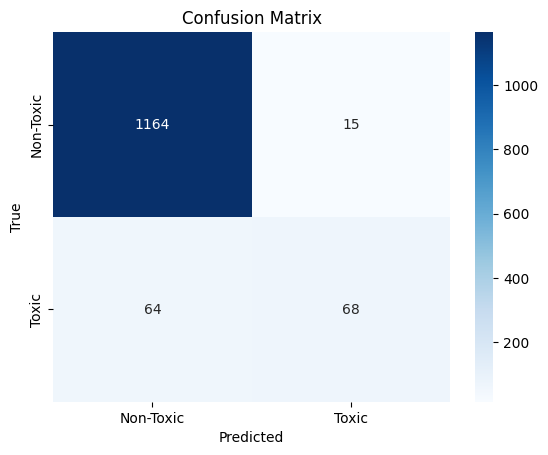

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

labels = ['Non-Toxic', 'Toxic']

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()


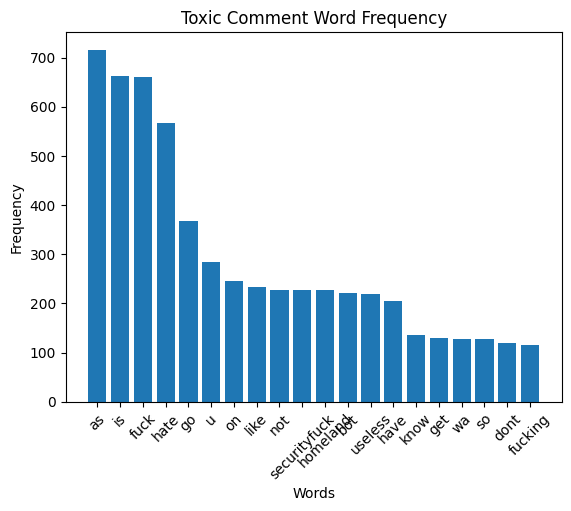

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

toxic_comments = dataset[dataset['toxic'] == 1]['comment_text']

toxic_text = ' '.join(toxic_comments)

tokens = nltk.word_tokenize(toxic_text)

word_frequency = Counter(tokens)

top_words = word_frequency.most_common(20)
words, frequencies = zip(*top_words)

plt.bar(words, frequencies)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Toxic Comment Word Frequency')

plt.xticks(rotation=45)

plt.show()


**TEST OUR COMMENT**

In [17]:
our_comment = "Have a happy day"
preprocessed_comment = preprocess_text(our_comment)
vectorized_comment = vectorizer.transform([preprocessed_comment]).toarray()

ANN_prediction_prob = ANN_model.predict(vectorized_comment)
ANN_prediction = (ANN_prediction_prob > 0.5).astype(int)
prediction_label_ANN = 'toxic' if ANN_prediction == 1 else 'non-toxic'
print('ANN_Prediction:', prediction_label_ANN)

NB_prediction_prob = NB_model.predict(vectorized_comment)
NB_prediction = (NB_prediction_prob > 0.5).astype(int)
prediction_label_NB = 'toxic' if NB_prediction == 1 else 'non-toxic'
print('NB_Prediction:', prediction_label_NB)

SVC_prediction_prob = SVC_model.predict(vectorized_comment)
SVC_prediction = (SVC_prediction_prob > 0.5).astype(int)
prediction_label_SVC = 'toxic' if SVC_prediction == 1 else 'non-toxic'
print('SVC_Prediction:', prediction_label_SVC)

LR_prediction_prob = LR_Model.predict(vectorized_comment)
LR_prediction = (LR_prediction_prob > 0.5).astype(int)
prediction_label_LR = 'toxic' if LR_prediction == 1 else 'non-toxic'
print('LR_Prediction:', prediction_label_LR)


1/1 [==============================] - 0s 28ms/step
ANN_Prediction: non-toxic
NB_Prediction: non-toxic
SVC_Prediction: non-toxic
LR_Prediction: non-toxic


**IMPROVE OUR TESTING**

In [18]:
our_comment = "i hate you"
preprocessed_comment = preprocess_text(our_comment)
vectorized_comment = vectorizer.transform([preprocessed_comment]).toarray()

models = {
    'ANN': (ANN_model, 'Artificial_Neural_Network'),
    'NB': (NB_model, 'Naive_Bayes'),
    'SVC': (SVC_model, 'Support_Vector_Machine'),
    'LR': (LR_Model, 'Logistic_Regression')
}

for model_key, (model, model_label) in models.items():
    prediction_prob = model.predict(vectorized_comment)
    prediction = (prediction_prob > 0.5).astype(int)
    prediction_label = 'toxic' if prediction == 1 else 'non-toxic'
    print(f'{model_label} Prediction:', prediction_label)



1/1 [==============================] - 0s 31ms/step
Artificial_Neural_Network Prediction: toxic
Naive_Bayes Prediction: non-toxic
Support_Vector_Machine Prediction: toxic
Logistic_Regression Prediction: toxic
